# Homework 2 Solutions

## Problem 1

### 1a: P(Y =1 | x) = 0.2
Calculate the expected loss for each decision.
\begin{align*}
E_{Loss}[\text{predict }0] &= 0 \times 0.8 + 10 \times 0.2 = 2 \\
E_{Loss}[\text{predict }1] &= 10 \times 0.8 + 0 \times 0.2 = 8 \\
E_{Loss}[\text{reject}] &= 3 \\
\end{align*}
Therefore, the decision should be to predict a 0.

### 1b: P(Y =1 | x) = 0.4
Calculate the expected loss for each decision.
\begin{align*}
E_{Loss}[\text{predict }0] &= 0 \times 0.6 + 10 \times 0.4 = 4 \\
E_{Loss}[\text{predict }1] &= 10 \times 0.6 + 0 \times 0.4 = 6 \\
E_{Loss}[\text{reject}] &= 3 \\
\end{align*}
Therefore, the decision should be to reject the test sample for human classification.

### 1c: Generalized decision

\begin{align*}
E_{Loss}[\text{predict }0] &= 0(1 - p_1) + 10p_1 = 10p_1 \\
E_{Loss}[\text{predict }1] &= 10(1 - p_1) + 0p_1 = 10(1-p_1) \\
E_{Loss}[\text{reject}] &= 3 \\
\end{align*}

Predict 0 if $10p_1 < 3$ and $10p_1 < 10(1-p_1)$, therefore $\theta_0 = 0.3$. Reject if $3 \le 10p_1$ and $3 \le 10(1-p_1)$, so $\theta_1 = 0.7$.

## Problem 2

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut


# load the data
spamTrain = pd.read_csv("spam.train.dat", sep=' ', header = None)
spamTest = pd.read_csv("spam.test.dat", sep=' ', header=None)

subspamTrain= spamTrain[:500]

# split into train features and labels
trainX = spamTrain.ix[:, spamTrain.columns != 57]
trainY = spamTrain.ix[:, 57]

testX = spamTest.ix[:, spamTest.columns != 57]
testY = spamTest.ix[:, 57]

subtrainX = subspamTrain.ix[:, subspamTrain.columns != 57]
subtrainY = subspamTrain.ix[:, 57]

### 2a: K=2

In [2]:
# function to estimate alpha using cross validation
def estimate_alpha(alpha_list, n_folds):
    scores = list()
    scores_std = list()
    # run the the list of alphas
    for alpha in alpha_list:
        lassoModel = LogisticRegression(penalty='l1',solver='liblinear', C=alpha)
        this_scores = cross_val_score(lassoModel, trainX, trainY, scoring="roc_auc", cv=n_folds, n_jobs=1)
        scores.append(np.mean(this_scores))
        scores_std.append(np.std(this_scores)) 
    # find the minimum of the scores and the index
    optAlpha = np.max(scores)
    optAlphaIdx = np.argmax(scores)
    lowerBound = scores[optAlphaIdx] - (scores_std[optAlphaIdx]/np.sqrt(n_folds))
    # get the smallest alpha within +/- std error
    for i, alpha in enumerate(alpha_list):
        if scores[i] >= lowerBound:
            oneStdAlpha = alpha
            break
    return scores, scores_std, optAlpha, oneStdAlpha

In [3]:
# function to plot the cross-validation error curve
def plot_cv_curve(alphas, scores, scores_std, optAlpha, n_folds):
    scores, scores_std = np.array(scores), np.array(scores_std)
    plt.figure().set_size_inches(4, 3)
    plt.semilogx(alphas, scores)

    # plot error lines showing +/- std. errors of the scores
    std_error = scores_std / np.sqrt(n_folds)

    plt.semilogx(alphas, scores + std_error, 'b--')
    plt.semilogx(alphas, scores - std_error, 'b--')

    # alpha=0.2 controls the translucency of the fill color
    plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)
    plt.ylabel('CV error +/- std error')
    plt.xlabel('alpha')
    plt.axhline(np.max(scores), linestyle='--', color='.5')
    plt.axvline(optAlpha, linestyle='--', color='r', label='alpha')
    plt.legend()
    plt.xlim([alphas[0], alphas[-1]])

usual rule: alpha = 0.969777 
one stand error rule: alpha = 0.568987


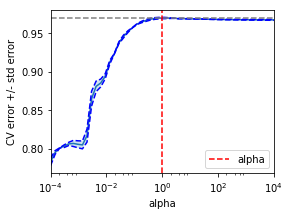

In [4]:
alphas = np.logspace(-4, 4, 50)
scores, scores_std, k2optalpha, k2osralpha = estimate_alpha(alphas, 2)
print ("usual rule: alpha = %f \none stand error rule: alpha = %f"%(k2optalpha,k2osralpha))

plot_cv_curve(alphas, scores, scores_std, k2optalpha, 2)

In [5]:
def build_lasso_test(optAlpha):
    lasso = LogisticRegression(C=optAlpha,penalty='l1',solver='liblinear').fit(trainX,trainY)
    trainY_hat = lasso.predict(trainX)
    testY_hat = lasso.predict(testX)
    return lasso.coef_, metrics.roc_auc_score(trainY, trainY_hat), metrics.roc_auc_score(testY, testY_hat)

In [6]:
k2coefficients, k2TrainAUC, k2TestAUC = build_lasso_test(k2osralpha)
print ("training AUC = %f \ntest AUC = %f"%(k2TrainAUC, k2TestAUC))

training AUC = 0.927097 
test AUC = 0.913593


### 2b: K=5

usual rule: alpha = 0.971207 
one stand error rule: alpha = 0.268270


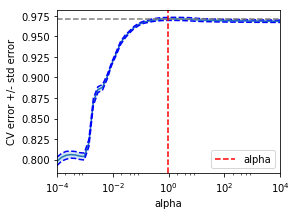

In [7]:
scores, scores_std, k5optalpha, k5osralpha = estimate_alpha(alphas, 5)
print ("usual rule: alpha = %f \none stand error rule: alpha = %f"%(k5optalpha,k5osralpha))

plot_cv_curve(alphas, scores, scores_std, k5optalpha, 5)

In [8]:
k5coefficients, k5TrainAUC, k5TestAUC = build_lasso_test(k5osralpha)
print ("training AUC = %f \ntest AUC = %f"%(k5TrainAUC,k5TestAUC))

training AUC = 0.920272 
test AUC = 0.910483


### 2c: K=10

usual rule: alpha = 0.972276 
one stand error rule: alpha = 0.268270


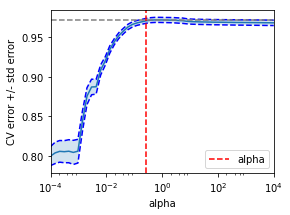

In [9]:
scores, scores_std, k10optalpha, k10osralpha = estimate_alpha(alphas, 10)
print ("usual rule: alpha = %f \none stand error rule: alpha = %f"%(k10optalpha,k10osralpha))

plot_cv_curve(alphas, scores, scores_std, k10osralpha, 5)

In [10]:
k10coefficients, k10TrainAUC, k10TestAUC = build_lasso_test(k10osralpha)
print ("training AUC = %f \ntest AUC = %f"%(k10TrainAUC,k10TestAUC))

training AUC = 0.920272 
test AUC = 0.908966


### 2d: LOOCV

usual rule: alpha = 0.918000 
one stand error rule: alpha = 0.568987


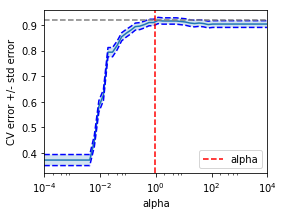

In [11]:
scores = list()
scores_std = list()
loo = LeaveOneOut()

# run the the list of alphas
for alpha in alphas:
    lassoModel = LogisticRegression(penalty='l1',solver='liblinear', C=alpha)
    this_scores = list()
    # use loocv
    for train_index, test_index in loo.split(subtrainX):
        looTrainX, looTestX = subtrainX.ix[train_index], subtrainX.ix[test_index]
        looTrainY, looTestY = subtrainY.ix[train_index], subtrainY.ix[test_index]
        lassoModel.fit(looTrainX, looTrainY)
        this_scores.append(metrics.accuracy_score(looTestY, lassoModel.predict(looTestX)))
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores)) 
# find the minimum of the scores and the index
knoptalpha = np.max(scores)
optAlphaIdx = np.argmax(scores)
lowerBound = scores[optAlphaIdx] - (scores_std[optAlphaIdx]/np.sqrt(500))
# get the smallest alpha within +/- std error
for i, alpha in enumerate(alphas):
    if scores[i] >= lowerBound:
        knosralpha = alpha
        break
print ("usual rule: alpha = %f \none stand error rule: alpha = %f"%(knoptalpha, knosralpha))

plot_cv_curve(alphas, scores, scores_std, knoptalpha, 500)

In [12]:
kncoefficients, knTrainAUC, knTestAUC = build_lasso_test(knosralpha)
print ("training AUC = %f \ntest AUC = %f"%(knTrainAUC, knTestAUC))

training AUC = 0.927097 
test AUC = 0.913593


In [13]:
print pd.DataFrame([["2", k2osralpha, k2TrainAUC, k2TestAUC],
                    ["5", k5osralpha, k5TrainAUC, k5TestAUC],
                    ["10", k10osralpha, k10TrainAUC, k10TestAUC],
                    ["N", knosralpha, knTrainAUC,knTestAUC]],
                  columns = ['K', 'lambda', "trainAUC", "testAUC"])

    K    lambda  trainAUC   testAUC
0   2  0.568987  0.927097  0.913593
1   5  0.268270  0.920272  0.910483
2  10  0.268270  0.920272  0.908966
3   N  0.568987  0.927097  0.913593


### 2e: coefficients

In [14]:
p2table = pd.DataFrame([k2coefficients[0]])
p2table = p2table.append([k5coefficients[0]])
p2table = p2table.append([k10coefficients[0]])
p2table = p2table.append([kncoefficients[0]])
p2table.insert(0,'lambda',[k2osralpha,k5osralpha,k10osralpha,knosralpha])
p2table.index=['k=2','k=5','k=10','LOOCV']
p2table.transpose()

,k=2,k=5,k=10,LOOCV
lambda,0.568987,0.268270,0.268270,0.568987
0,-0.289200,-0.145826,-0.145849,-0.289137
1,-0.147971,-0.125839,-0.125768,-0.147952
2,0.096283,0.068963,0.069910,0.096373
3,0.427290,0.247174,0.247210,0.427215
4,0.552976,0.540581,0.541053,0.553130
5,1.256563,1.025962,1.027549,1.256807
6,1.636953,1.618739,1.619280,1.637278
7,0.492528,0.470761,0.471021,0.492613
8,0.793179,0.600907,0.601547,0.793240


## Problem 3

In [15]:
def calc_loglikelihood(yTrue, estProb):
    yInt = yTrue.astype(int)
    # since it's probability we'll want to fix np.log(0) problems
    np.place(estProb, estProb == 0, 0.00000000001)
    np.place(estProb, estProb == 1, 0.99999999999)
    tmp = yInt * np.log(estProb) + (1 - yInt) * np.log(1 - estProb)
    return np.sum(tmp)

In [16]:
def calculate_AIC(yTrue, estProb, selected):
    N = len(yTrue)
    d = len(selected)
    return 2.0 * d / N - 2.0 / N * calc_loglikelihood(yTrue, estProb)

In [17]:
def calculate_BIC(yTrue, estProb, selected):
    N = len(yTrue)
    d = len(selected)
    return d * np.log(N) - 2.0 * calc_loglikelihood(yTrue, estProb)

### 3a: forward AIC

In [18]:
def forward_selection(model_sel):
    logrmodel = LogisticRegression()
    # keep track of the things remaining
    remaining = np.arange(0, 57).tolist()
    selected = []
    current_score, best_new_score = np.inf, np.inf
    while len(remaining) > 0 and current_score == best_new_score:
        scores_with_candidates = []
        for i in remaining:
            canColumn = selected + [i]
            canTrainX = trainX.iloc[:, canColumn]
            logrmodel.fit(canTrainX, trainY)
            trainY_hat = logrmodel.predict_proba(canTrainX)
            scores_with_candidates.append((model_sel(trainY, trainY_hat[:, 1], canColumn), i))

        scores_with_candidates.sort(reverse=True)
        best_new_score, best_candidate = scores_with_candidates.pop()
        if best_new_score > current_score:
            break
        remaining.remove(best_candidate)
        selected.append(best_candidate)
        current_score = best_new_score
    
    # do the book-keeping to report train/test auc
    fTrainX = trainX.iloc[:, selected]
    fTestX = testX.iloc[:, selected]
    logrmodel.fit(fTrainX, trainY)
    yTrainHat = logrmodel.predict(fTrainX)
    yTestHat = logrmodel.predict(fTestX)
    coef = np.zeros(57)
    coef[selected] = logrmodel.coef_.flatten()
    return coef, metrics.roc_auc_score(trainY, yTrainHat), metrics.roc_auc_score(testY, yTestHat)

In [19]:
fAICcoef, fAtrainAUC, fAtestAUC = forward_selection(calculate_AIC)

### 3b: backward AIC

In [20]:
import itertools

def backward_selection(model_sel):
    logrmodel = LogisticRegression()
    # keep track of the things selected
    selected = range(57)
    logrmodel.fit(trainX, trainY)
    trainY_hat = logrmodel.predict_proba(trainX)
    score = model_sel(trainY, trainY_hat[:, 1], selected)
    current_score, best_new_score = score, score
    while len(selected) > 0 and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in itertools.combinations(selected, len(selected) - 1):
            canTrainX = trainX.iloc[:, candidate]
            logrmodel.fit(canTrainX, trainY)
            trainY_hat = logrmodel.predict_proba(canTrainX)
            scores_with_candidates.append((model_sel(trainY, trainY_hat[:, 1], candidate), candidate))
        scores_with_candidates.sort(reverse=True)
        best_new_score, best_candidate = scores_with_candidates.pop()
        if best_new_score > current_score:
            break
        selected = best_candidate
        current_score = best_new_score
    
    # do the book-keeping to report train/test auc
    fTrainX = trainX.iloc[:, selected]
    fTestX = testX.iloc[:, selected]
    logrmodel.fit(fTrainX, trainY)
    yTrainHat = logrmodel.predict(fTrainX)
    yTestHat = logrmodel.predict(fTestX)
    coef = np.zeros(57)
    coef[list(selected)] = logrmodel.coef_.flatten()
    return coef, metrics.roc_auc_score(trainY, yTrainHat), metrics.roc_auc_score(testY, yTestHat)

In [21]:
bAICcoef, bAtrainAUC, bAtestAUC = backward_selection(calculate_AIC)

### 3c: forward BIC

In [22]:
fBICcoef, fBtrainAUC, fBtestAUC = forward_selection(calculate_BIC)

### 3d: backward BIC

In [23]:
bBICcoef, bBtrainAUC, bBtestAUC = backward_selection(calculate_BIC)

In [24]:
# put together all the coefficients
coefTable = pd.DataFrame([fAICcoef, fBICcoef, bAICcoef, bBICcoef],
                          index=["forward AIC","backward AIC","forward BIC","backward BIC"])
print coefTable.transpose()

    forward AIC  backward AIC  forward BIC  backward BIC
0      0.000000      0.000000    -0.411066      0.000000
1     -0.155927      0.000000    -0.165964      0.000000
2      0.000000      0.000000     0.000000      0.000000
3      0.737382      0.000000     0.740524      0.000000
4      0.577682      0.623538     0.569015      0.637882
5      1.285147      1.243926     1.269710      1.225483
6      1.693346      1.809515     1.668597      1.823891
7      0.516509      0.550354     0.513975      0.557190
8      0.888531      0.909980     0.933129      0.921078
9      0.000000      0.000000     0.033152      0.000000
10     0.000000      0.000000     0.000000      0.000000
11     0.000000      0.000000     0.000000      0.000000
12     0.000000      0.000000     0.000000      0.000000
13     0.000000      0.000000     0.000000      0.000000
14     1.040223      0.000000     1.041737      0.000000
15     1.120536      1.107656     1.116397      1.111982
16     0.694615      0.697930  

### 3e: conclusion

In [25]:
pd.DataFrame([[fAtrainAUC,fAtestAUC],
              [bAtrainAUC,bAtestAUC],
              [fBtrainAUC,fBtestAUC],
              [bBtrainAUC,bBtestAUC]],
             index=["forward AIC","backward AIC","forward BIC","backward BIC"],
             columns = ["training AUC", "testing AUC"])

,training AUC,testing AUC
forward AIC,0.926500,0.909953
backward AIC,0.928072,0.912076
forward BIC,0.920597,0.910027
backward BIC,0.918918,0.908510


## Problem 4

In [26]:
pd.DataFrame([[k2TrainAUC, k2TestAUC],
              [k5TrainAUC, k5TestAUC],
              [k10TrainAUC, k10TestAUC],
              [knTrainAUC, knTestAUC],
              [fAtrainAUC, fAtestAUC],
              [bAtrainAUC, bAtestAUC],
              [fBtrainAUC, fBtestAUC],
              [bBtrainAUC, bBtestAUC]],
             index=["k2 LASSO","k5 LASSO","k10 LASSO","LOOCV LASSO","forward AIC","backward AIC","forward BIC","backward BIC"],
             columns = [" train AUC", "test AUC"])

,train AUC,test AUC
k2 LASSO,0.927097,0.913593
k5 LASSO,0.920272,0.910483
k10 LASSO,0.920272,0.908966
LOOCV LASSO,0.927097,0.913593
forward AIC,0.926500,0.909953
backward AIC,0.928072,0.912076
forward BIC,0.920597,0.910027
backward BIC,0.918918,0.908510


In [27]:
p2table.transpose()

,k=2,k=5,k=10,LOOCV
lambda,0.568987,0.268270,0.268270,0.568987
0,-0.289200,-0.145826,-0.145849,-0.289137
1,-0.147971,-0.125839,-0.125768,-0.147952
2,0.096283,0.068963,0.069910,0.096373
3,0.427290,0.247174,0.247210,0.427215
4,0.552976,0.540581,0.541053,0.553130
5,1.256563,1.025962,1.027549,1.256807
6,1.636953,1.618739,1.619280,1.637278
7,0.492528,0.470761,0.471021,0.492613
8,0.793179,0.600907,0.601547,0.793240


In [29]:
print "forward AIC selected:", len(np.flatnonzero(fAICcoef))
print "backward AIC selected",len(np.flatnonzero(bAICcoef))
print "forward BIC selected",len(np.flatnonzero(fBICcoef))
print "backward BIC selected",len(np.flatnonzero(bBICcoef))


forward AIC selected: 40
backward AIC selected 46
forward BIC selected 24
backward BIC selected 23


### the computational efficiency order is: 
 'k=2 cv' > 'k=5 cv' > 'k=10 cv' > 'forward AIC' = 'backward AIC' = 'forward BIC' = 'backward BIC' > 'LOOCV'

## Problem 5

### 5a

In [30]:
# get 10 bootstrap samples
from sklearn.utils import resample
names = locals()
for i in range(10):
    spamBS = resample(spamTrain)
    names['spamBS%s' % i] = spamBS

In [31]:
# get the testing set for each bootstrap sample
index = spamTrain.index.tolist()
for i in range(10):
    names['spamRE%s' % i] = pd.DataFrame()
    indexBS = names['spamBS%s' % i].index.tolist()
    indexRE = list(set(index) - set(indexBS)) 
    for j in range(len(indexRE)):
        names['spamRE%s' % i]=pd.concat([names['spamRE%s' % i],spamTrain.iloc[indexRE[j],:]],axis=1)
    names['spamRE%s' % i] = names['spamRE%s' % i].T       

5.42867543932


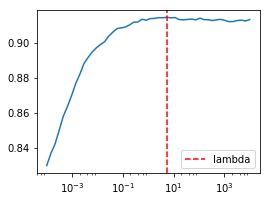

In [32]:
# find the optimal regularization parameter for ridge logistc regression
scores=list()
for alpha in alphas:
    ridge = LogisticRegression(penalty='l2', C = alpha)
    aucList = list()
    for i in range(10):
        bsX = names['spamBS%s' % i].ix[:, spamTrain.columns != 57]
        bsY = names['spamBS%s' % i].ix[:, 57]
        reX = names['spamRE%s' % i].ix[:, spamTrain.columns != 57]
        reY = names['spamRE%s' % i].ix[:, 57]
        ridge.fit(bsX,bsY)
        reY_hat=ridge.predict(reX)
        aucList.append(metrics.roc_auc_score(reY, reY_hat))
    scores.append(np.mean(aucList))

optBSAlpha = alphas[np.argmax(scores)]
print optBSAlpha

plt.figure().set_size_inches(4, 3)
plt.semilogx(alphas, scores)    
plt.axvline(optBSAlpha, linestyle='--', color='r', label='lambda')
plt.legend()


### 5b

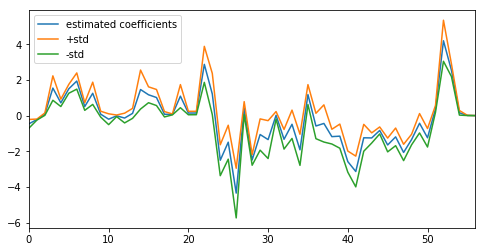

In [33]:
ridge = LogisticRegression(C=optBSAlpha, penalty='l2')
estcoef=list()
stdcoefp=list()
stdcoefm=list()
for i in range(10):
    bsX = names['spamBS%s' % i].ix[:, spamTrain.columns != 57]
    bsY = names['spamBS%s' % i].ix[:, 57]
    ridge.fit(bsX,bsY)
    names['coef%s' % i]=ridge.coef_[0]

for i in range(57):
    tempcoef=list()
    for j in range(10):
        tempcoef.append(names['coef%s' % j][i])
    estcoef.append(np.mean(tempcoef))
    stdcoefp.append(np.mean(tempcoef)+np.std(tempcoef))
    stdcoefm.append(np.mean(tempcoef)-np.std(tempcoef))

plt.figure().set_size_inches(8, 4)
plt.plot(estcoef,label='estimated coefficients')
plt.plot(stdcoefp,label='+std')
plt.plot(stdcoefm,label='-std')
plt.xlim([0,56])
plt.legend(loc=2,prop={'size':10}) 